<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.573833,61.348751,57.649441,-2.583240e-07,187.572025,187.572024,6.668432e-07
1,0.0,1.0,73.448962,44.863972,98.902108,-1.686363e-07,227.215042,227.215043,-9.468850e-07
2,0.0,2.0,78.391953,90.033423,90.208483,2.144391e-07,268.633859,268.633862,-2.880911e-06
3,0.0,3.0,35.159991,61.470577,77.667222,-2.282057e-07,184.297789,184.297790,-8.449095e-08
4,0.0,4.0,30.750976,48.683402,98.198238,-4.702785e-07,187.632616,187.632617,-6.880885e-07
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,91.319977,51.026892,96.315340,7.101831e-07,248.662210,248.662211,-1.721808e-06
29996,999.0,26.0,45.948000,85.520712,59.462461,-1.230786e-07,200.931173,200.931173,7.334572e-07
29997,999.0,27.0,95.409217,67.993549,97.466241,-1.785276e-07,270.869007,270.869009,-1.555073e-06
29998,999.0,28.0,36.117609,98.051410,63.253756,2.428078e-08,207.422774,207.422773,1.646154e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.573833,61.348751,57.649441,-2.583240e-07,187.572025,187.572024,6.668432e-07
1,0.0,1.0,73.448962,44.863972,98.902108,-1.686363e-07,227.215042,227.215043,-9.468850e-07
2,0.0,2.0,78.391953,90.033423,90.208483,2.144391e-07,268.633859,268.633862,-2.880911e-06
3,0.0,3.0,35.159991,61.470577,77.667222,-2.282057e-07,184.297789,184.297790,-8.449095e-08
4,0.0,4.0,30.750976,48.683402,98.198238,-4.702785e-07,187.632616,187.632617,-6.880885e-07
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,91.319977,51.026892,96.315340,7.101831e-07,248.662210,248.662211,-1.721808e-06
29996,999.0,26.0,45.948000,85.520712,59.462461,-1.230786e-07,200.931173,200.931173,7.334572e-07
29997,999.0,27.0,95.409217,67.993549,97.466241,-1.785276e-07,270.869007,270.869009,-1.555073e-06
29998,999.0,28.0,36.117609,98.051410,63.253756,2.428078e-08,207.422774,207.422773,1.646154e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    58.573833  61.348751  ...  187.572024  6.668432e-07
      1.0    73.448962  44.863972  ...  227.215043 -9.468850e-07
      2.0    78.391953  90.033423  ...  268.633862 -2.880911e-06
      3.0    35.159991  61.470577  ...  184.297790 -8.449095e-08
      4.0    30.750976  48.683402  ...  187.632617 -6.880885e-07
...                ...        ...  ...         ...           ...
999.0 25.0   91.319977  51.026892  ...  248.662211 -1.721808e-06
      26.0   45.948000  85.520712  ...  200.931173  7.334572e-07
      27.0   95.409217  67.993549  ...  270.869009 -1.555073e-06
      28.0   36.117609  98.051410  ...  207.422773  1.646154e-06
      29.0   34.297242  61.466845  ...  193.755043 -1.525939e-06

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    58.573833  61.348751  ...  187.572024  6.668432e-07
      1.0    73.448962  44.863972  ...  227.215043 -9.468850e-07
      2.0    78.391953  90.033423  ...  268.633862 -2.880911e-06
      3.0    35.159991  61.470577  ...  184.297790 -8.449095e-08
      4.0    30.750976  48.683402  ...  187.632617 -6.880885e-07
...                ...        ...  ...         ...           ...
999.0 25.0   91.319977  51.026892  ...  248.662211 -1.721808e-06
      26.0   45.948000  85.520712  ...  200.931173  7.334572e-07
      27.0   95.409217  67.993549  ...  270.869009 -1.555073e-06
      28.0   36.117609  98.051410  ...  207.422773  1.646154e-06
      29.0   34.297242  61.466845  ...  193.755043 -1.525939e-06

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,58.573833,61.348751,57.649441,-2.583240e-07,187.572025,187.572024,6.668432e-07
1,0.0,1.0,73.448962,44.863972,98.902108,-1.686363e-07,227.215042,227.215043,-9.468850e-07
2,0.0,2.0,78.391953,90.033423,90.208483,2.144391e-07,268.633859,268.633862,-2.880911e-06
3,0.0,3.0,35.159991,61.470577,77.667222,-2.282057e-07,184.297789,184.297790,-8.449095e-08
4,0.0,4.0,30.750976,48.683402,98.198238,-4.702785e-07,187.632616,187.632617,-6.880885e-07
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,91.319977,51.026892,96.315340,7.101831e-07,248.662210,248.662211,-1.721808e-06
29996,999.0,26.0,45.948000,85.520712,59.462461,-1.230786e-07,200.931173,200.931173,7.334572e-07
29997,999.0,27.0,95.409217,67.993549,97.466241,-1.785276e-07,270.869007,270.869009,-1.555073e-06
29998,999.0,28.0,36.117609,98.051410,63.253756,2.428078e-08,207.422774,207.422773,1.646154e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    58.573833  61.348751  ...  187.572024  6.668432e-07
      1.0    73.448962  44.863972  ...  227.215043 -9.468850e-07
      2.0    78.391953  90.033423  ...  268.633862 -2.880911e-06
      3.0    35.159991  61.470577  ...  184.297790 -8.449095e-08
      4.0    30.750976  48.683402  ...  187.632617 -6.880885e-07
...                ...        ...  ...         ...           ...
999.0 25.0   91.319977  51.026892  ...  248.662211 -1.721808e-06
      26.0   45.948000  85.520712  ...  200.931173  7.334572e-07
      27.0   95.409217  67.993549  ...  270.869009 -1.555073e-06
      28.0   36.117609  98.051410  ...  207.422773  1.646154e-06
      29.0   34.297242  61.466845  ...  193.755043 -1.525939e-06

[30000 rows x 7 columns]

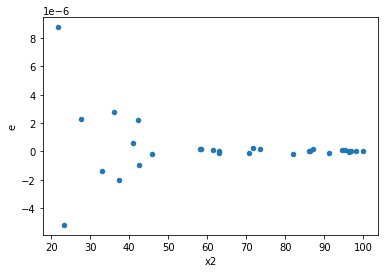

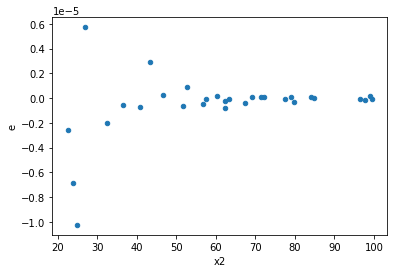

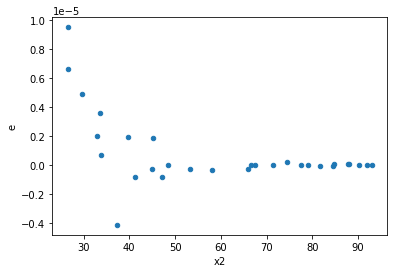

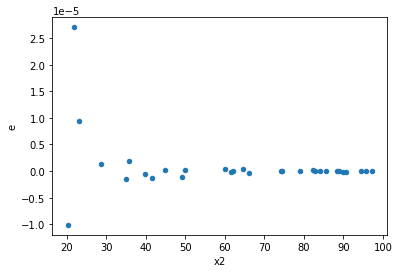

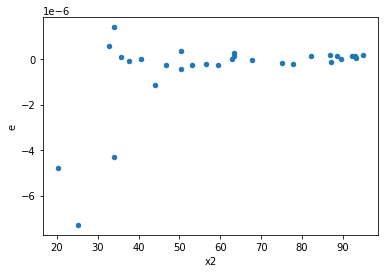

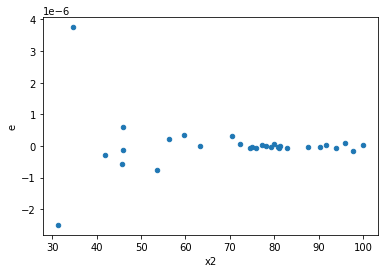

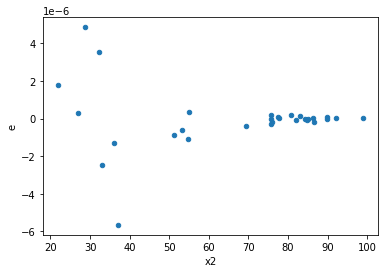

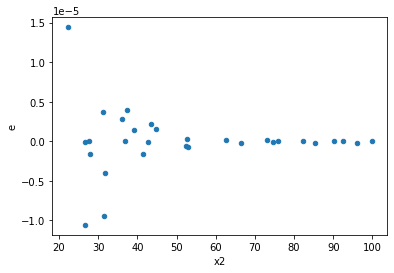

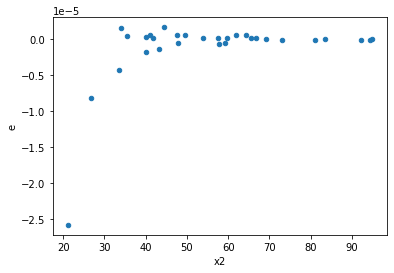

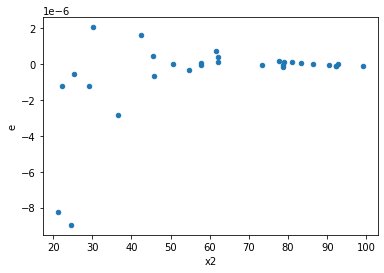

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,7.833514769949104e-14,2.390572923691033e-10,9.79189346243638e-15,2.988216154613791e-11,0.0003276835729342318,2.7577048138059565e-14,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,1.6549474866511856e-13,3.0401486608496714e-10,2.068684358313982e-14,3.800185826062089e-11,0.0005443640003409094,2.7027846083299656e-13,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,8.132895522333479e-14,3.260017756727695e-10,1.0166119402916848e-14,4.075022195909619e-11,0.0002494739639239581,8.088450259330416e-15,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,3.066599217572157e-13,2.1323369439783427e-10,3.833249021965196e-14,2.6654211799729284e-11,0.0014381400773607303,2.1259807393292433e-11,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,3.138916690668674e-12,1.2151203564733128e-10,3.9236458633358424e-13,1.518900445591641e-11,0.025832146370906535,7.858010193386405e-06,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,2.1513999279275213e-13,1.5585022414537302e-10,2.6892499099094016e-14,1.9481278018171628e-11,0.0013804278689524062,1.7688865735981843e-11,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,2.6230714109016932e-14,2.4227665942162556e-11,3.2788392636271166e-15,3.0284582427703195e-12,0.0010826760684102279,5.940631174114443e-12,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,1.881601085108968e-13,5.083851547882714e-10,2.35200135638621e-14,6.354814434853393e-11,0.0003701133023627733,4.768395265053442e-14,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,9.067996253010985e-14,6.278038006368169e-11,1.1334995316263731e-14,7.847547507960211e-12,0.0014443997063752724,2.1678401201552192e-11,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64